In [3]:
#a machine with 16gb of ram is required to run this notebook
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score , accuracy_score, recall_score, precision_score
from sklearn import svm
from sklearn.externals import joblib
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import preprocessing
import scipy
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [4]:
#load datasets
train_df = pd.read_csv("data/train.csv")
val_df = pd.read_csv("data/validation.csv")
test_df = pd.read_csv("data/test.csv")

#### Feature Analysis

In [5]:
def plot_statistics(df,x_label,y_label,title,format_="o",x_ticks=None):
    plt.figure(8,figsize=(8,4))
    plt.plot(df.ix[1458],format_,label="Advertiser 1458")
    plt.plot(df.ix[3358],format_,label="Advertiser 3358")

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    if x_ticks != None:
        plt.xticks(x_ticks)
    
    plt.title(title)
    plt.legend()
    plt.show()

In [6]:
#click analysis
#Highly unbalanced dataset

percentage_of_clicks=(train_df.click.value_counts()[1]/train_df.click.value_counts()[0])
print("Among {} impressions, only {}% were clicked".format(len(train_df),percentage_of_clicks*100))

Among 2697738 impressions, only 0.0754533880574425% were clicked


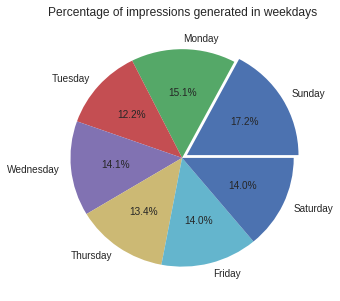

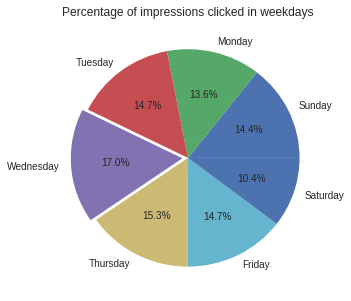

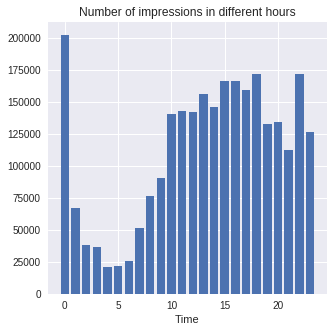

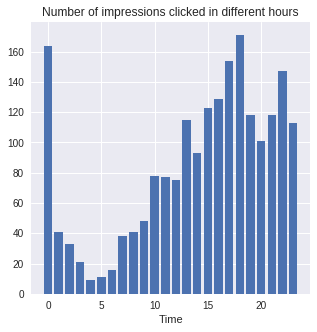

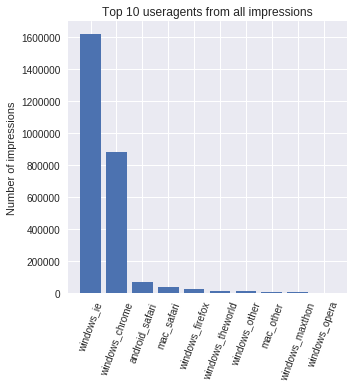

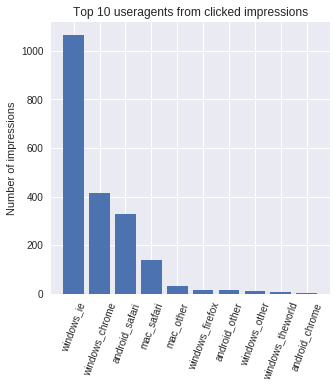

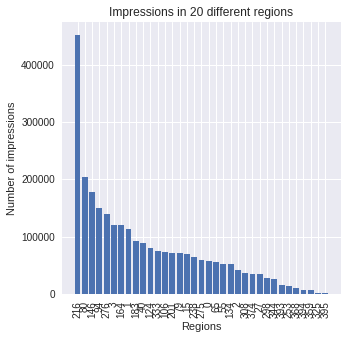

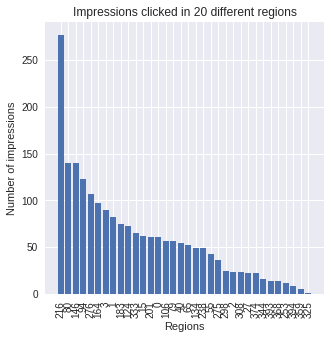

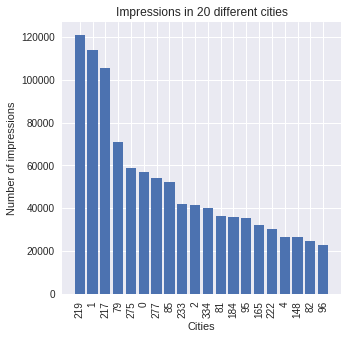

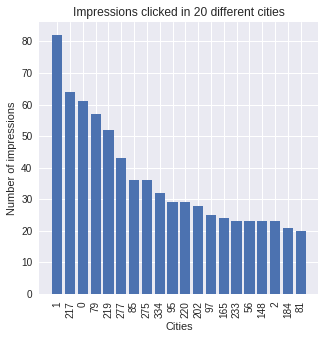

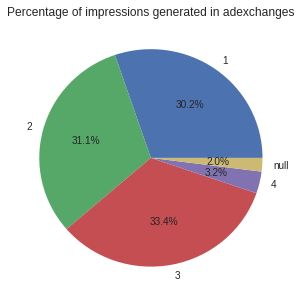

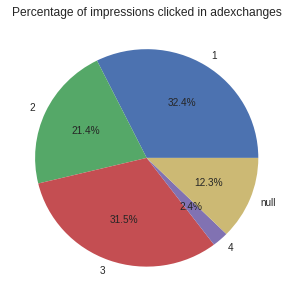

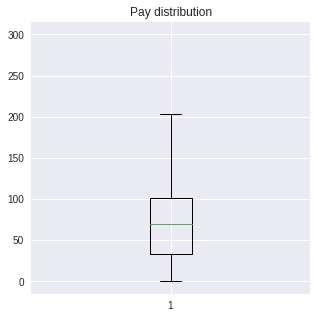

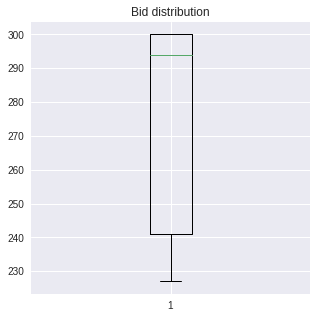

In [7]:
#weekday
weekdays_impressions_all=train_df.weekday.value_counts().sort_index()
weekdays_impressions_clicked=train_df[train_df.click==1].weekday.value_counts().sort_index()
days=["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]


plt.figure(1,figsize=(5,5))
plt.pie(weekdays_impressions_all,labels=days,autopct="%1.1f%%",explode=(0.05,0,0,0,0,0,0))
plt.title("Percentage of impressions generated in weekdays")
plt.show()

plt.figure(2,figsize=(5,5))
plt.pie(weekdays_impressions_clicked,labels=days,autopct="%1.1f%%",explode=(0,0,0,0.05,0,0,0))
plt.title("Percentage of impressions clicked in weekdays")
plt.show()

#hour
hours_impressions_all=train_df.hour.value_counts().sort_index()
hours_impressions_clicked=train_df[train_df.click==1].hour.value_counts().sort_index()

plt.figure(3,figsize=(5,5))
plt.bar(hours_impressions_all.index,hours_impressions_all,align="center")
plt.xlabel("Time")
plt.title("Number of impressions in different hours")
plt.show()

plt.figure(4,figsize=(5,5))
plt.bar(hours_impressions_clicked.index,hours_impressions_clicked,align="center")
plt.title("Number of impressions clicked in different hours")
plt.xlabel("Time")
plt.show()

#useragent
top_ten_useragents_all=train_df.useragent.value_counts().sort_values(ascending=False)[0:10]
top_ten_useragents_clicked=train_df[train_df.click==1].useragent.value_counts().sort_values(ascending=False)[0:10]

plt.figure(5,figsize=(5,5))
plt.bar(range(0,len(top_ten_useragents_all)),top_ten_useragents_all,tick_label=top_ten_useragents_all.index)
plt.xticks(rotation=70)
plt.title("Top 10 useragents from all impressions")
plt.ylabel("Number of impressions")
plt.show()

plt.figure(6,figsize=(5,5))
plt.bar(range(0,len(top_ten_useragents_clicked)),top_ten_useragents_clicked,tick_label=top_ten_useragents_clicked.index)
plt.xticks(rotation=70)
plt.title("Top 10 useragents from clicked impressions")
plt.ylabel("Number of impressions")
plt.show()


#region
top_ten_region_all=train_df.region.value_counts().sort_values(ascending=False)
top_ten_region_clicked=train_df[train_df.click==1].region.value_counts().sort_values(ascending=False)

plt.figure(7,figsize=(5,5))
plt.bar(range(0,len(top_ten_region_all)),top_ten_region_all,tick_label=top_ten_region_all.index)
plt.xticks(rotation=90)
plt.title("Impressions in 20 different regions")
plt.xlabel("Regions")
plt.ylabel("Number of impressions")
plt.show()

plt.figure(8,figsize=(5,5))
plt.bar(range(0,len(top_ten_region_clicked)),top_ten_region_clicked,tick_label=top_ten_region_clicked.index)
plt.xticks(rotation=90)
plt.title("Impressions clicked in 20 different regions")
plt.xlabel("Regions")
plt.ylabel("Number of impressions")
plt.show()

#city
top_ten_city_all=train_df.city.value_counts().sort_values(ascending=False)[0:20]
top_ten_city_clicked=train_df[train_df.click==1].city.value_counts().sort_values(ascending=False)[0:20]

plt.figure(9,figsize=(5,5))
plt.bar(range(0,len(top_ten_city_all)),top_ten_city_all,tick_label=top_ten_city_all.index)
plt.xticks(rotation=90)
plt.title("Impressions in 20 different cities")
plt.xlabel("Cities")
plt.ylabel("Number of impressions")
plt.show()

plt.figure(10,figsize=(5,5))
plt.bar(range(0,len(top_ten_city_clicked)),top_ten_city_clicked,tick_label=top_ten_city_clicked.index)
plt.xticks(rotation=90)
plt.title("Impressions clicked in 20 different cities")
plt.xlabel("Cities")
plt.ylabel("Number of impressions")
plt.show()

#adexchange
adexchange_impressions_all=train_df.adexchange.value_counts().sort_index()
adexchange_impressions_clicked=train_df[train_df.click==1].adexchange.value_counts().sort_index()
days=["1","2","3","4","null"]

plt.figure(11,figsize=(5,5))
plt.pie(adexchange_impressions_all,labels=days,autopct="%1.1f%%")
plt.title("Percentage of impressions generated in adexchanges")
plt.show()

plt.figure(12,figsize=(5,5))
plt.pie(adexchange_impressions_clicked,labels=days,autopct="%1.1f%%")
plt.title("Percentage of impressions clicked in adexchanges")
plt.show()

#pay - bid distribution
plt.figure(13,figsize=(5,5))
plt.boxplot(train_df.payprice)
plt.title("Pay distribution")
plt.show()

plt.figure(14,figsize=(5,5))
plt.boxplot(train_df.bidprice)
plt.title("Bid distribution")
plt.show()

### Paper Inspired Plot

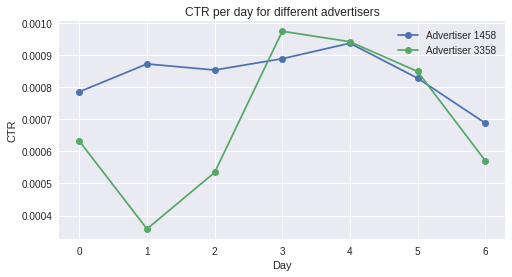

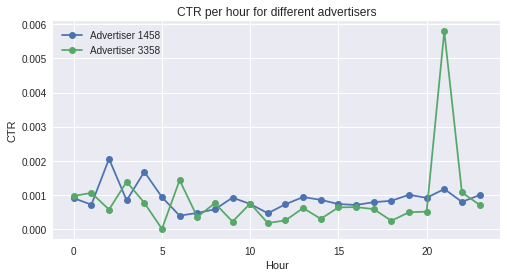

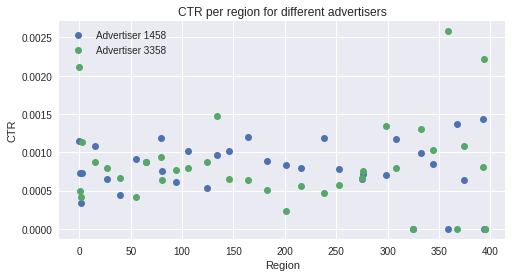

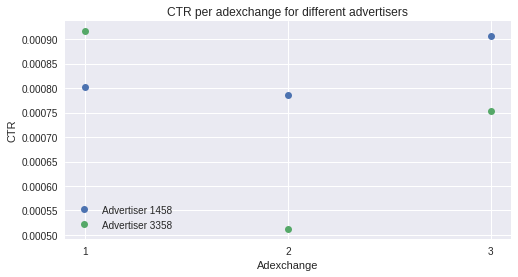

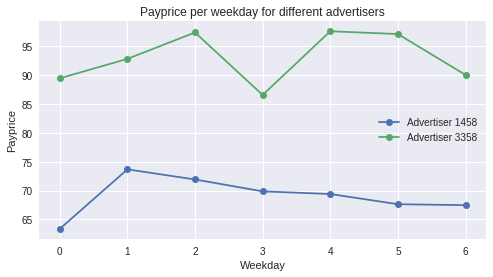

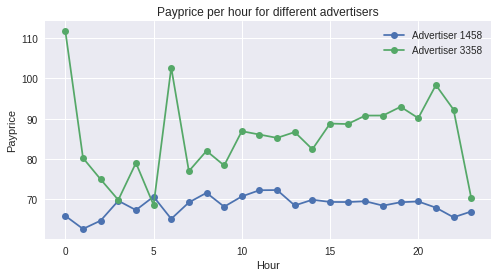

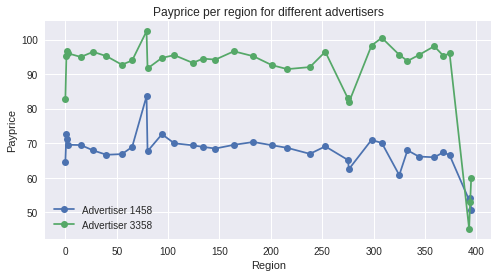

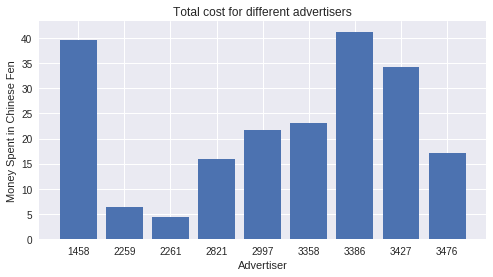

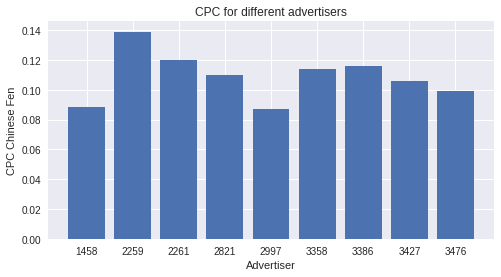

In [8]:
ctr_per_advertiser_and_weekday = pd.DataFrame(train_df.groupby(["advertiser","weekday"])\
                                              .apply(lambda x:x.click.sum()/len(x)))

plot_statistics(ctr_per_advertiser_and_weekday,"Day","CTR","CTR per day for different advertisers",format_="-o")
#================================================================================================================
ctr_per_advertiser_and_hour = pd.DataFrame(train_df.groupby(["advertiser","hour"])\
                                              .apply(lambda x:x.click.sum()/len(x)))

plot_statistics(ctr_per_advertiser_and_hour,"Hour","CTR","CTR per hour for different advertisers",format_="-o")
#================================================================================================================
ctr_per_advertiser_and_region = pd.DataFrame(train_df.groupby(["advertiser","region"])\
                                              .apply(lambda x:x.click.sum()/len(x)))

plot_statistics(ctr_per_advertiser_and_region,"Region","CTR","CTR per region for different advertisers",format_="o")
#================================================================================================================
ctr_per_advertiser_and_adexchange = pd.DataFrame(train_df.groupby(["advertiser","adexchange"])\
                                              .apply(lambda x:x.click.sum()/len(x)))

plot_statistics(ctr_per_advertiser_and_adexchange,"Adexchange","CTR","CTR per adexchange for different advertisers",\
                format_="o",x_ticks=[1,2,3])
#================================================================================================================
payprice_per_advertiser_and_weekday = pd.DataFrame(train_df.groupby(["advertiser","weekday"])\
                                              .apply(lambda x:x.payprice.mean()))

plot_statistics(payprice_per_advertiser_and_weekday,"Weekday","Payprice",\
                title="Payprice per weekday for different advertisers",format_="-o")
#================================================================================================================
payprice_per_advertiser_and_hour = pd.DataFrame(train_df.groupby(["advertiser","hour"])\
                                              .apply(lambda x:x.payprice.mean()))

plot_statistics(payprice_per_advertiser_and_hour,"Hour","Payprice",\
                title="Payprice per hour for different advertisers",format_="-o")
#================================================================================================================
payprice_per_advertiser_and_region = pd.DataFrame(train_df.groupby(["advertiser","region"])\
                                              .apply(lambda x:x.payprice.mean()))

plot_statistics(payprice_per_advertiser_and_region,"Region","Payprice",\
                title="Payprice per region for different advertisers",format_="-o")
#================================================================================================================


total_pay_per_advertiser = (pd.DataFrame(train_df.groupby(["advertiser"])\
                                        .apply(lambda x:x[(x.bidprice>x.payprice)&(x.click==1)].payprice.sum())))/1000

plt.figure(8,figsize=(8,4))
plt.bar(range(1,len(total_pay_per_advertiser)+1),total_pay_per_advertiser.values,\
        tick_label=total_pay_per_advertiser.index)
plt.xlabel("Advertiser")
plt.ylabel("Money Spent in Chinese Fen")
plt.title("Total cost for different advertisers")
plt.show()



cpc_per_advertiser = (pd.DataFrame(train_df.groupby(["advertiser"]).\
                                   apply(lambda x:x[(x.bidprice>x.payprice)&(x.click==1)].payprice.sum()/(x[(x.bidprice>x.payprice)].click.sum()))))/1000
plt.figure(8,figsize=(8,4))
plt.bar(range(1,len(cpc_per_advertiser)+1),cpc_per_advertiser.values,\
        tick_label=cpc_per_advertiser.index)
plt.xlabel("Advertiser")
plt.ylabel("CPC Chinese Fen")
plt.title("CPC for different advertisers")
plt.show()

### Preprocessing and Exploration

In [9]:
def merge_split_df(train_set=None,val_set=None,test_set=None,concat_set=None,action="merge",len_train=None,len_val=None,len_test=None):
    
    if action=="merge":
    
        concat_set=pd.DataFrame()
        concat_set=concat_set.append(train_set)
        concat_set=concat_set.append(val_set)
        concat_set=concat_set.append(test_set)
        
        concat_set.reset_index(inplace=True)
        concat_set.drop(["index"],axis=1,inplace=True)
        
        
        
        len_train = len(train_set)
        len_val = len(val_set)
        len_test = len(test_set)
        
        
        return concat_set,len_train,len_val,len_test
    
    if action=="split":
        
        train_set = concat_set[0:len_train]
        train_set.reset_index(inplace=True)
        train_set = train_set.drop("index",axis=1)
        #concat_df.drop(list(range(0,len_train)),inplace=True)
        
        val_set = concat_set[len_train:len_train+len_val]
        val_set.reset_index(inplace=True)
        val_set = val_set.drop("index",axis=1)
        #concat_df.drop(list(range(len_train,len_train+len_val)),inplace=True)
        
        test_set = concat_set[len_train+len_val:len_train+len_val+len_test]
        test_set.reset_index(inplace=True)
        test_set = test_set.drop("index",axis=1)
        #concat_df.drop(list(range(len_train+len_val,len_train+len_val+len_test)),inplace=True)
        return train_set, val_set, test_set

In [10]:
def chunks(l, n):
    """Yield successive n-sized chunks from l."""
    for i in range(0, len(l), n):
        yield l[i:i + n]

In [11]:
#columns_to_hot_encode=["weekday","useragent","region","city","adexchange","slotvisibility","slotformat","creative","keypage","advertiser"]
def hot_encode_columns(df, list_of_columns_to_hot_encode):
    for col in list_of_columns_to_hot_encode:
        df[col] = df[col].astype('object')
    
    one_hot=pd.get_dummies(df[list_of_columns_to_hot_encode])
    
    df=df.join(one_hot)
    #df.drop(list_of_columns_to_hot_encode,axis=1,inplace=True)
    return df

In [12]:
#One hot encode useragent
def one_hot_encode_useragent(df):
    df.useragent=df.useragent.str.replace("_"," ")
    vect = CountVectorizer()
    X = vect.fit_transform(df.useragent)
    df=df.join(pd.DataFrame(X.toarray(), columns=vect.get_feature_names()))
    #df.drop("usertag",axis=1,inplace=True)
    return df, vect.get_feature_names()

In [13]:
def click_prediction_to_df(df,used_model,threshold_to_predict_click=0.5):
    
    df["prob_of_click"] = pd.DataFrame(used_model.predict_proba(df[features]))[1]
    df["predicted_click"] = df.prob_of_click.apply(lambda x: 1 if x > threshold_to_predict_click else 0)
    #df["pctr"]=df.prob_of_click/df.prob_of_click.mean()

In [14]:
#One hot encode tags
def one_hot_encode_tags(df):
    df.usertag=df.usertag.str.replace(","," ")
    vect = CountVectorizer()
    X = vect.fit_transform(df.usertag)
    df=df.join(pd.DataFrame(X.toarray(), columns=vect.get_feature_names()))
    #df.drop("usertag",axis=1,inplace=True)
    return df, vect.get_feature_names()

In [15]:
#remove unwanted features
def remove_features(df,feature_list):
    df.drop(feature_list,axis=1,inplace=True)
    df.reset_index(inplace=True,drop="Index")

In [16]:
#checks for dublicates, weekday range, hour range
def check(df, dublicates=True,weekday=True,hour=True,pay_bidding_price=True):
    
    if dublicates==True:
        if len(df)==len(df.drop_duplicates()):
            print("there are no dublicates")
        else:
            df.drop_duplicates(inplace=True)
            print("dublicates removed")
            
    if weekday==True:
        assert(df.weekday.max()<=6)
        assert(df.weekday.min()>=0)
        
    if hour==True:
        assert(df.weekday.max()<=23)
        assert(df.weekday.min()>=0)
        
    if pay_bidding_price==True:
        
        num_rows_to_drop=len(df[df.payprice>df.bidprice])
        if num_rows_to_drop>0:
            df.drop(df[df.payprice>df.bidprice].index,inplace=True)
            print(num_rows_to_drop,"rows dropped to fix pay_bid_price")

In [17]:
def assertions(df):
    assert(len(df)==len(df.bidid.unique()))
    assert(df.logtype.unique()==1)
    assert(df.urlid.unique()=="null")

In [18]:
def ctr_priors(df,features,usertags,useragents):
    
    len_of_df=len(df)
    
    if "usertag" in features:
        features=features+usertags
        features=[x for x in features if x not in ["usertag"]]
    
    if "useragent" in features:
        features=features+useragents
        features=[x for x in features if x not in ["useragent"]]
    
    for feature in features:            
        
        for value_of_feature in df[feature].unique():
            ctr_of_value_of_feature=len(df[(df[feature]==value_of_feature)&(df.click==1)])/len_of_df
            df.ix[df[feature]==value_of_feature,"ctr_"+feature]=ctr_of_value_of_feature

* In our case all the data are of the logtype 1. Logtype 1 means that it is an impression. The column will be dropped. 
* All bidids are unique, thus they will be dropped
* urlid will be dropped as it is null for all points.

In [19]:
def preprocess(df,features_to_remove=None,find_prior_for=None,lst_of_features_to_onehot=None,\
do_onehot_useragents=True,do_onehot_usertags=True):
    
    
    assertions(df)
    
    if features_to_remove != None:
        remove_features(df,features_to_remove)
    
    if do_onehot_useragents:
        df,user_agents = one_hot_encode_useragent(df)
    
    if do_onehot_usertags:
        df,user_tags = one_hot_encode_tags(df)

    if find_prior_for != None:
        ctr_priors(df,features=find_prior_for,useragents=user_agents,usertags=user_tags)

    if lst_of_features_to_onehot != None:
        df=hot_encode_columns(df,lst_of_features_to_onehot)
    
    return df

In [20]:
def downsample(df,n=2034,seed=25):
    np.random.seed(seed)
    concat_set=pd.DataFrame()
    
    
    sub_sample=df[df.click==0].sample(n)
    
    
    concat_set=concat_set.append(sub_sample)
    concat_set=concat_set.append(df[df.click==1])
    concat_set.sample(frac=1)
    
    return concat_set

## Preprocess Control

In [21]:
#check train_df, val_df and test_df for inconsistencies
check(train_df,dublicates=True,weekday=True,hour=True,pay_bidding_price=True)
check(val_df,dublicates=True,weekday=True,hour=True,pay_bidding_price=True)
check(test_df,dublicates=True,weekday=True,hour=True,pay_bidding_price=False)

there are no dublicates
33579 rows dropped to fix pay_bid_price
there are no dublicates
3691 rows dropped to fix pay_bid_price
there are no dublicates


In [22]:
#train_df_downsampled = downsample(train_df, n=8000, seed=25)
train_df_downsampled = train_df

In [23]:
#concat datasets
concat_df,len_downsampled_train,len_val,len_test = merge_split_df(train_set=train_df_downsampled, \
                                                                  val_set=val_df, test_set=test_df,action="merge")

%xdel train_df_downsampled
%xdel val_df
%xdel test_df

In [24]:
#preprocess
features_to_remove = ["logtype","IP","urlid","userid","domain","url","slotid"]
lst_of_features_to_onehot = ["weekday","region","city","adexchange","slotvisibility","slotformat","creative","advertiser","keypage"]
find_prior_for = ["weekday","hour","city","slotwidth","slotheight","slotvisibility","slotformat","creative"]


concat_df = preprocess(concat_df,\
                       features_to_remove=features_to_remove,\
                       find_prior_for=None, \
                       lst_of_features_to_onehot=lst_of_features_to_onehot,\
                       do_onehot_useragents=True,\
                       do_onehot_usertags=True)

In [25]:
#split datasets
train_df_, val_df, test_df = merge_split_df(concat_set=concat_df,\
                                            action="split",\
                                            len_train=len_downsampled_train,\
                                            len_val=len_val,len_test=len_test)
%xdel concat_df

In [26]:
#downsample for training
train_df_downsampled = downsample(train_df_, n=8000, seed=25)

## Models

In [27]:
features = [x for x in train_df_downsampled.columns if x not in \
           ["bidid","weekday","region","city","adexchange","slotvisibility","slotformat",\
            "creative","keypage","advertiser","bidprice","payprice","click","useragent","usertag"]]

In [28]:
X_train = train_df_downsampled[features]
Y_train = train_df_downsampled["click"]

X_dev = val_df[features]
Y_dev = val_df["click"]

### Logistic Regression

In [29]:
# ===========Find best logistic regression model=============
c_range = np.arange(0.32,0.34,0.001) #for roc_auc
#c_range = np.linspace(start=0.0001,stop=2,num=50)
c_range = [0.32]
#c_range=np.arange(0.01,0.03,0.001) #for precision

tuned_parameters = [{'C': c_range,"solver":["liblinear"],"penalty":["l1"],
                     "class_weight":["balanced"]}]

scores=["roc_auc"]#["neg_mean_squared_error"]#["roc_auc"]
for score in scores:
    lr_model=GridSearchCV(LogisticRegression(),param_grid=tuned_parameters,scoring=score,cv=3,n_jobs=-1)
    lr_model.fit(X_train, Y_train)

    #print("Scoring: ",score)
    print("parameters selected: ",lr_model.best_params_)
    print(" ")
    print("Train set:")
    print(score+":",lr_model.best_score_)
    print(" ")
#------------------------------------------------------------
   
    
#====================Fit the model found=====================
lr=LogisticRegression(C=lr_model.best_params_["C"],class_weight=lr_model.best_params_["class_weight"]\
                         ,penalty=lr_model.best_params_["penalty"],solver=lr_model.best_params_["solver"],n_jobs=-1)
lr.fit(X_train,Y_train)    
#------------------------------------------------------------

#===================Performance of the model=================
preds=lr.predict(X_dev)
print("Test set:")
print("roc_auc:",roc_auc_score(y_score=preds, y_true=Y_dev))
print("recall:",recall_score(y_pred=preds, y_true=Y_dev))
print("precision:",precision_score(y_pred=preds,y_true=Y_dev))
print("rmse: ",mean_squared_error(y_pred=preds,y_true=Y_dev))
print(" ")
print("# of all impressions: {}".format(len(X_dev)))
print("true # of clicks:",sum(Y_dev),"|| # of clicks correctly predicted:",\
      sum(lr.predict(X_dev.ix[Y_dev[Y_dev==1].index,:])),"|| total # of clicks predicted:",sum(preds))
#------------------------------------------------------------

parameters selected:  {'solver': 'liblinear', 'penalty': 'l1', 'C': 0.32, 'class_weight': 'balanced'}
 
Train set:
roc_auc: 0.831601302554
 
Test set:
roc_auc: 0.760357081179
recall: 0.709090909091
precision: 0.00279144672094
rmse:  0.188452938276
 
# of all impressions: 296058
true # of clicks: 220.0 || # of clicks correctly predicted: 156.0 || total # of clicks predicted: 55885.0


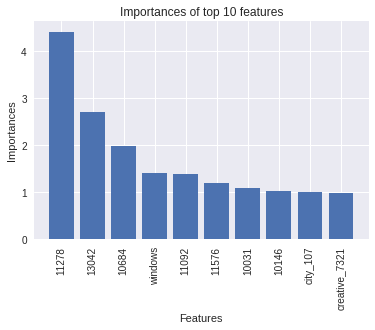

In [30]:
importances=pd.Series(abs(lr.coef_[0]),index=X_train[features].columns)
importances.sort_values(inplace=True,ascending=False)


plt.bar(range(0,len(importances[0:10])),importances[0:10],\
        tick_label=importances.index[0:10])
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Importances")
plt.title("Importances of top 10 features")

plt.show()

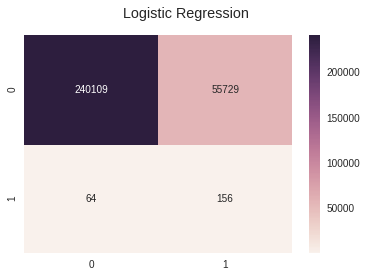

In [31]:
sns.heatmap(confusion_matrix(Y_dev, preds, labels=[0,1]),annot=True,fmt="d")
sns.set(font_scale=1)
sns.plt.suptitle('Logistic Regression')

### XGBoost

In [32]:
#tune the hyperparameters | here the ranges can be defined for each parameter
action = "tune_params"
if action == "tune_params":
    n_estimators_range = [200]
    learning_rate_range = [0.1]
    max_depth_range = [4]#[3,4,5]list(range(3,10,2))
    min_child_weight_range = [3] #[1,2,3,4,5,6]
    reg_alpha_range = [6]#[105, 108,110,112, 115]


    tuned_parameters = [{'max_depth': max_depth_range,"learning_rate":learning_rate_range,\
                         "n_estimators":n_estimators_range,"min_child_weight":min_child_weight_range,\
                        "reg_alpha":reg_alpha_range}]

    scores=["roc_auc"]
    for score in scores:
        xgb_model = GridSearchCV(XGBClassifier(nthread=-1),param_grid=tuned_parameters,scoring=score,cv=3)
        xgb_model.fit(X_train, Y_train)

        print("parameters selected: ",xgb_model.best_params_)
        print(" ")
        print("Train set:")
        print(score+":",xgb_model.best_score_)
        print(" ")
    #------------------------------------------------------------

parameters selected:  {'n_estimators': 200, 'reg_alpha': 6, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 3}
 
Train set:
roc_auc: 0.875344494576
 


In [33]:
###### ===================Performance of the model=================
preds=xgb_model.predict(X_dev)
print("Test set:")
print("roc_auc:",roc_auc_score(y_score=preds, y_true=Y_dev))
print("recall:",recall_score(y_pred=preds, y_true=Y_dev))
print("precision:",precision_score(y_pred=preds,y_true=Y_dev))
print("rmse: ",mean_squared_error(y_pred=preds,y_true=Y_dev))
print(" ")
print("# of all impressions: {}".format(len(X_dev)))
print("true # of clicks:",sum(Y_dev),"|| # of clicks correctly predicted:",\
      sum(xgb_model.predict(X_dev.ix[Y_dev[Y_dev==1].index,:])),"|| total # of clicks predicted:",sum(preds))
#------------------------------------------------------------

Test set:
roc_auc: 0.755913279319
recall: 0.536363636364
precision: 0.0159956621933
rmse:  0.0248633713664
 
# of all impressions: 296058
true # of clicks: 220.0 || # of clicks correctly predicted: 118.0 || total # of clicks predicted: 7377.0


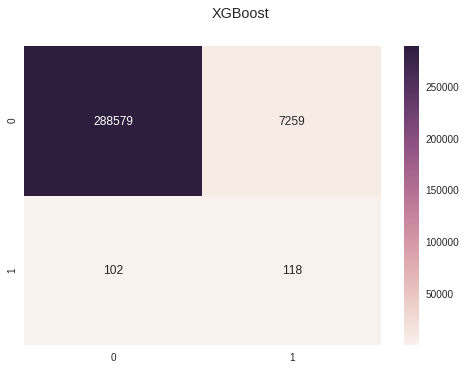

In [34]:
sns.heatmap(confusion_matrix(Y_dev, preds, labels=[0,1]),annot=True,fmt="d")
sns.set(font_scale=1)
sns.plt.suptitle('XGBoost')

In [35]:
#predict for training set in chunks to make it more memory efficient.
all_preds = []
for i in chunks(train_df_.ix[:,features],50000):
    current_preds = xgb_model.predict_proba(i)[:,1]
    all_preds =all_preds + list(current_preds)

In [36]:
#apply pctr predictions to training, validation and test set 
train_df_["prob_of_click"]=all_preds
click_prediction_to_df(df=val_df, used_model=xgb_model, threshold_to_predict_click=0.5)
click_prediction_to_df(df=test_df, used_model=xgb_model, threshold_to_predict_click=0.5)

## Bidding Strategy

In [37]:
def plot_bidding_metrics(df,label_="train_set",plotting_column="constant_bid"):
    plt.figure(0,figsize=(10,10))

    df = df.copy()
    df = df.sort_values(plotting_column)
    
    plt.subplot(2,2,1)
    plt.plot(df[plotting_column],df["num_clicks"],"o",label=label_)
    plt.xlabel(plotting_column)
    plt.ylabel("Num of Clicks Succeeded")
    plt.title("Num of Clicks Succeeded - "+plotting_column)
    plt.legend()

    plt.subplot(2,2,2)
    plt.plot(df[plotting_column],df["ctr"],"o",label=label_)
    plt.xlabel(plotting_column)
    plt.ylabel("CTR")
    plt.title("CTR - "+plotting_column)
    plt.legend()
    
    plt.subplot(2,2,3)
    plt.plot(df[plotting_column],df["cpc"],"o",label=label_)
    plt.xlabel(plotting_column)
    plt.ylabel("CPC")
    plt.title("CPC - "+plotting_column)
    plt.legend()

    plt.show()
    
    print("Best result:")
    print("======================================================================================================")
    print(df.sort_values(["num_clicks","ctr","budget_spent"],ascending=False).head(1))
    print("======================================================================================================")

In [38]:
def metrics_for_bidding_old(df,budget,type_of_bidding,constant_bid=None,a_coef=None,b_coef=None,bias=None,bid_for_all=None):
    
    if type_of_bidding == "constant":
        if constant_bid == None:
            return "Provide a constant bid"
        else:
            df["bid_constant"] = constant_bid
            impressions_that_can_be_won = df[df.bid_constant>df.payprice].copy()
    
    elif type_of_bidding == "linear":
        if a_coef == None or bias == None or bid_for_all == None or b_coef == None:
            return "Provide a_coef, b_coef, bias and bid_for_all"
        
        else:
            avg_ctr = 1
            #MODEL
            df["temporary_bid"] = (b_coef)*np.power(df["prob_of_click"],2) + (a_coef/avg_ctr)*df["prob_of_click"] + bias
            impressions_that_can_be_won = df[df.temporary_bid>df.payprice].copy()        

    if bid_for_all == False:        
        certain_zeros = impressions_that_can_be_won[(impressions_that_can_be_won.prob_of_click<0.04)].index
        impressions_that_can_be_won.drop(certain_zeros,inplace=True)

            
            
    impressions_that_can_be_won["budget_spent"]=impressions_that_can_be_won.payprice.cumsum()
    impressions_won = impressions_that_can_be_won[impressions_that_can_be_won.budget_spent<=budget]
    budget_spent = np.array(impressions_won.budget_spent[-1:])
    num_clicks = impressions_won.click.sum()
    num_impressions_won = len(impressions_won)
    ctr = num_clicks/num_impressions_won
    cpc = (budget_spent/num_clicks)[0]

    return ctr,num_clicks, cpc, budget_spent[0], num_impressions_won

In [39]:
def metrics_for_polynomial_bidding(df,budget,a_coef,b_coef,bias,bid_for_all):
    

    df["temporary_bid"] = (b_coef)*np.power(df["prob_of_click"],2) + (a_coef)*df["prob_of_click"] + bias
    impressions_that_can_be_won = df[df.temporary_bid>df.payprice].copy()        

    if bid_for_all == False:        
        certain_zeros = impressions_that_can_be_won[(impressions_that_can_be_won.prob_of_click<0.04)].index
        impressions_that_can_be_won.drop(certain_zeros,inplace=True)

    impressions_that_can_be_won["budget_spent"]=impressions_that_can_be_won.payprice.cumsum()
    impressions_won = impressions_that_can_be_won[impressions_that_can_be_won.budget_spent<=budget]
    budget_spent = np.array(impressions_won.budget_spent[-1:])
    num_clicks = impressions_won.click.sum()
    num_impressions_won = len(impressions_won)
    ctr = num_clicks/num_impressions_won
    #cpc = (num_clicks/budget_spent)[0]
    cpc = (budget_spent/(num_clicks)/1000)[0]

    return ctr,num_clicks, cpc, budget_spent[0], num_impressions_won

In [40]:
def apply_bids_to_df(df,b_coef,a_coef,bias,bidded_for_all,column_name):
    df[column_name] = (b_coef)*np.power(df["prob_of_click"],2) + (a_coef)*df["prob_of_click"] + bias
    
    if bidded_for_all == False:
        certain_zeros = df[(df.prob_of_click<0.04)].index
        df.ix[certain_zeros,column_name] = 0
    

### Tunning the binning strategy

In [41]:
def tune_polynomial_bidding(df,budget,csv_name,tune_b_coef,tune_a_coef,tune_bias,bid_for_all,\
                            load,nfolds=3,examples_in_fold = len(val_df)):
    
    if load == False:
        range_b_coef = [160]#np.linspace(start=100,stop=500,num=41) 
        range_a_coef = np.linspace(start=610,stop=640,num=31)#np.linspace(start=610,stop=630,num=21)
        range_bias = np.linspace(start=-10,stop=10,num=31)#np.linspace(start=120,stop=160,num=81) 
        
        
        if tune_b_coef == False:
            range_b_coef = [0]
            
        if tune_a_coef == False:
            range_a_coef = [0]
            
        if tune_bias == False:
            range_bias = [0]            

        total_rounds = range(len(range_b_coef)*len(range_a_coef)*len(range_bias)*nfolds)
        results_df = pd.DataFrame(index=total_rounds)
                
        index = -1
        rounds = 0
        print("Total rounds: {}".format(len(total_rounds)/nfolds))
        for b_coef in range_b_coef:
            for a_coef in range_a_coef:
                for bias in range_bias:
                    
                    rounds +=1
                    print("Round {}, b_coef: {}, a_coef: {}, bias: {}".format(rounds,b_coef,a_coef,bias))
                    
                    for i in range(0,nfolds):    
                        index += 1
                        ctr,num_clicks,cpc,budget_spent,num_impressions = \
                                        metrics_for_polynomial_bidding(df.sample(n=examples_in_fold),\
                                                                       budget,\
                                                                       b_coef=b_coef,\
                                                                       a_coef=a_coef,\
                                                                       bias=bias,\
                                                                       bid_for_all=bid_for_all)
                    

                        results_df.ix[index,"ctr"] = ctr
                        results_df.ix[index,"num_clicks"] = num_clicks
                        results_df.ix[index,"cpc"] = cpc
                        results_df.ix[index,"budget_spent"] = budget_spent
                        results_df.ix[index,"num_impressions_won"] = num_impressions
                        results_df.ix[index,"b_coef"] = b_coef
                        results_df.ix[index,"a_coef"] = a_coef
                        results_df.ix[index,"bias"] = bias



        aggregated_results_df = results_df.groupby(["b_coef","a_coef","bias"]).mean()\
                            [["num_clicks","ctr","budget_spent","cpc"]]\
                            .sort_values(["num_clicks","ctr","budget_spent"],ascending=False).reset_index()              

        results_df.sort_values(["num_clicks","ctr","budget_spent"],ascending=False,inplace=True)
        results_df.reset_index(inplace=True,drop="index")
        results_df.to_csv(csv_name)

        print("Best Result:")
        print(aggregated_results_df.ix[0,:])


        return aggregated_results_df, results_df    
        
    else:
        results_df = pd.read_csv(csv_name,index_col=0)
        
        aggregated_results_df = results_df.groupby(["b_coef","a_coef","bias"]).mean()\
                                [["num_clicks","ctr","budget_spent","cpc"]]\
                                .sort_values(["num_clicks","ctr","budget_spent"],ascending=False).reset_index()         

        print("Best Result:")
        print(aggregated_results_df.ix[0,:])
        return aggregated_results_df, results_df

### Constant Bidding

In [42]:
#Tune or load
aggregated_results_df, results_df = tune_polynomial_bidding(train_df_,\
                                                            budget = 6250000,\
                                                            csv_name = "results/constant_bidding.csv",\
                                                            tune_b_coef = False,\
                                                            tune_a_coef = False,\
                                                            tune_bias = True,\
                                                            bid_for_all = False,\
                                                            nfolds = 3,\
                                                            load =  True)

Best Result:
b_coef          0.000000e+00
a_coef          0.000000e+00
bias            1.490000e+02
num_clicks      8.033333e+01
ctr             7.507487e-04
budget_spent    6.249998e+06
cpc             7.853652e+01
Name: 0, dtype: float64


In [43]:
#performance on validation set
metrics_for_polynomial_bidding(val_df,6250000,b_coef=0,a_coef=0,bias=149,bid_for_all=True)

(0.00078680417006210133, 84.0, 74.404190476190479, 6249952.0, 106761)

In [44]:
#apply bids to test set
apply_bids_to_df(val_df,b_coef=0,a_coef=0,bias=149,bidded_for_all=True,column_name="constant_bid_no_smart_rule")
apply_bids_to_df(train_df_,b_coef=0,a_coef=0,bias=149,bidded_for_all=True,column_name="constant_bid_no_smart_rule")
apply_bids_to_df(test_df,b_coef=0,a_coef=0,bias=149,bidded_for_all=True,column_name="constant_bid_no_smart_rule")

In [45]:
#plot_bidding_metrics(aggregated_results_df,plotting_column="bias")

### Linear Bidding no bias

In [46]:
#Tune or load
aggregated_results_df, results_df = tune_polynomial_bidding(train_df_,\
                                                            budget = 6250000,\
                                                            csv_name = "results/linear_bidding_no_bias_no_smart_rule.csv",\
                                                            tune_b_coef = False,\
                                                            tune_a_coef = True,\
                                                            tune_bias = False,\
                                                            bid_for_all = True,\
                                                            nfolds = 3,\
                                                            load =  True)

Best Result:
b_coef          0.000000e+00
a_coef          6.240000e+02
bias            0.000000e+00
num_clicks      2.006667e+02
ctr             1.568556e-03
budget_spent    6.146121e+06
cpc             3.066066e+01
Name: 0, dtype: float64


In [47]:
metrics_for_polynomial_bidding(val_df,6250000,b_coef=0,a_coef=624,bias=0,bid_for_all=True)

(0.0014097633947102544, 180.0, 34.086327777777775, 6135539.0, 127681)

In [48]:
apply_bids_to_df(val_df,b_coef=0,a_coef=624,bias=0,bidded_for_all=True,column_name="linear_bidding_no_bias_no_smart_rule")
apply_bids_to_df(train_df_,b_coef=0,a_coef=624,bias=0,bidded_for_all=True,column_name="linear_bidding_no_bias_no_smart_rule")
apply_bids_to_df(test_df,b_coef=0,a_coef=624,bias=0,bidded_for_all=True,column_name="linear_bidding_no_bias_no_smart_rule")

In [49]:
#plot_bidding_metrics(aggregated_results_df,plotting_column="a_coef")

### Linear Bidding with bias and rule

In [50]:
aggregated_results_df, results_df = tune_polynomial_bidding(train_df_,\
                                                            budget = 6250000,\
                                                            csv_name = "results/linear_bidding_with_bias_with_smart_rule_test.csv",\
                                                            tune_b_coef = False,\
                                                            tune_a_coef = True,\
                                                            tune_bias = True,\
                                                            bid_for_all = False,\
                                                            nfolds = 3,\
                                                            load =  True)

Best Result:
b_coef          0.000000e+00
a_coef          6.100000e+02
bias           -4.000000e+00
num_clicks      2.030000e+02
ctr             1.788498e-03
budget_spent    5.599293e+06
cpc             2.761788e+01
Name: 0, dtype: float64


In [51]:
metrics_for_polynomial_bidding(val_df,6250000,b_coef=0,a_coef=610,bias=2,bid_for_all=False)

(0.0014922527212886431, 180.0, 33.656088888888888, 6058096.0, 120623)

In [52]:
apply_bids_to_df(val_df,b_coef=0,a_coef=610,bias=-4,bidded_for_all=False,column_name="linear_bidding_with_bias_with_smart_rule")
apply_bids_to_df(train_df_,b_coef=0,a_coef=610,bias=-4,bidded_for_all=False,column_name="linear_bidding_with_bias_with_smart_rule")
apply_bids_to_df(test_df,b_coef=0,a_coef=610,bias=-4,bidded_for_all=False,column_name="linear_bidding_with_bias_with_smart_rule")

### Quadratic Bidding

In [53]:
aggregated_results_df, results_df = tune_polynomial_bidding(train_df_,\
                                                            budget = 6250000,\
                                                            csv_name = "results/quadratic_bidding_with_bias_with_smart_rule2.csv",\
                                                            tune_b_coef = True,\
                                                            tune_a_coef = True,\
                                                            tune_bias = True,\
                                                            bid_for_all = False,\
                                                            nfolds = 4,\
                                                            load =  True)

Best Result:
b_coef          1.600000e+02
a_coef          6.180000e+02
bias           -2.666667e+00
num_clicks      2.065000e+02
ctr             1.738189e-03
budget_spent    6.064220e+06
cpc             2.950754e+01
Name: 0, dtype: float64


In [54]:
metrics_for_polynomial_bidding(val_df,6250000,b_coef=160,a_coef=618,bias=-2.666667,bid_for_all=False)

(0.0015247626508967458, 181.0, 33.489828729281768, 6061659.0, 118707)

In [55]:
apply_bids_to_df(val_df,b_coef=160,a_coef=618,bias=-2.666667,bidded_for_all=False,column_name="quadratic_bidding_with_bias_with_smart_rule")
apply_bids_to_df(train_df_,b_coef=160,a_coef=618,bias=-2.666667,bidded_for_all=False,column_name="quadratic_bidding_with_bias_with_smart_rule")
apply_bids_to_df(test_df,b_coef=160,a_coef=618,bias=-2.666667,bidded_for_all=False,column_name="quadratic_bidding_with_bias_with_smart_rule")

### Random Bidding

In [56]:
def tune_random_bidding(df,budget,lower_limit,min_diff_lower_upper,max_of_upper_limit_range,csv_name,load,\
                        bid_for_all,nfolds=3,examples_in_fold = len(val_df)):
    
    if load == False:
        upper_limit_range = np.linspace(start=lower_limit+min_diff_lower_upper,stop=max_of_upper_limit_range,num=30)

        total_rounds = range(len(upper_limit_range)*nfolds)
        results_df = pd.DataFrame(index=total_rounds)



        rounds = 0
        index = -1
        print("Total rounds: {}".format(len(total_rounds)/nfolds))
        for upper_limit in upper_limit_range:
            rounds += 1
            print("Round {}, upper_limit: {}".format(rounds,upper_limit))

            for i in range(0,nfolds):
                index += 1

                ctr,num_clicks,cpc,budget_spent,num_impressions = \
                        metrics_for_random_bidding(df.sample(n=examples_in_fold)\
                                                   ,budget,lower_limit,upper_limit,bid_for_all)

                results_df.ix[index,"ctr"] = ctr
                results_df.ix[index,"num_clicks"] = num_clicks
                results_df.ix[index,"cpc"] = cpc
                results_df.ix[index,"budget_spent"] = budget_spent
                results_df.ix[index,"num_impressions_won"] = num_impressions
                results_df.ix[index,"random_bidding-upper_limit"] = upper_limit

        aggregated_results_df = results_df.groupby(["random_bidding-upper_limit"]).mean()\
                [["num_clicks","ctr","budget_spent","cpc"]]\
                .sort_values(["num_clicks","ctr","budget_spent"],ascending=False).reset_index()              

        results_df.sort_values(["num_clicks","ctr","budget_spent"],ascending=False,inplace=True)
        results_df.reset_index(inplace=True,drop="index")
        results_df.to_csv(csv_name)

        print("Best Result:")
        print(aggregated_results_df.ix[0,:])


        return aggregated_results_df, results_df
    
    else:
        results_df = pd.read_csv(csv_name,index_col=0)
        
        aggregated_results_df = results_df.groupby(["random_bidding-upper_limit"]).mean()\
                                [["num_clicks","ctr","budget_spent","cpc"]]\
                                .sort_values(["num_clicks","ctr","budget_spent"],ascending=False).reset_index()         

        print("Best Result:")
        print(aggregated_results_df.ix[0,:])
        return aggregated_results_df, results_df

In [57]:
def metrics_for_random_bidding(df,budget,lower_limit,upper_limit,bid_for_all):
    

    df["temporary_bid"] = np.random.randint(lower_limit,upper_limit,len(df))
    
    
    impressions_that_can_be_won = df[df.temporary_bid>df.payprice].copy()        

    if bid_for_all == False:        
        certain_zeros = impressions_that_can_be_won[(impressions_that_can_be_won.prob_of_click<0.04)].index
        impressions_that_can_be_won.drop(certain_zeros,inplace=True)

    impressions_that_can_be_won["budget_spent"]=impressions_that_can_be_won.payprice.cumsum()
    impressions_won = impressions_that_can_be_won[impressions_that_can_be_won.budget_spent<=budget]
    budget_spent = np.array(impressions_won.budget_spent[-1:])
    num_clicks = impressions_won.click.sum()
    num_impressions_won = len(impressions_won)
    ctr = num_clicks/num_impressions_won
    cpc = (budget_spent/(num_clicks)/1000)[0]

    return ctr,num_clicks, cpc, budget_spent[0], num_impressions_won

In [58]:
def apply_random_bid_to_df(df,lower_limit,upper_limit,bidded_for_all,column_name):
    df[column_name] = np.random.randint(lower_limit,upper_limit,len(df))

    if bidded_for_all == False:
        certain_zeros = df[(df.prob_of_click<0.04)].index
        df.ix[certain_zeros,column_name] = 0

### Random Bidding - no smart rule

In [59]:
aggregated_results_df, results_df = tune_random_bidding(train_df_,\
                                                        budget=6250000,\
                                                        lower_limit=100,\
                                                        min_diff_lower_upper=10,\
                                                        max_of_upper_limit_range=350,\
                                                        csv_name="results/random_bidding_no_smart_rule.csv",\
                                                        load=True,\
                                                        bid_for_all=True)

Best Result:
random_bidding-upper_limit    1.265517e+02
num_clicks                    7.600000e+01
ctr                           6.303958e-04
budget_spent                  6.249982e+06
cpc                           8.230200e+01
Name: 0, dtype: float64


In [60]:
metrics_for_random_bidding(val_df,6250000,100,126,bid_for_all=True)

(0.000672852479170647, 81.0, 77.160222222222217, 6249978.0, 120383)

In [61]:
apply_random_bid_to_df(val_df,lower_limit=100,upper_limit=126,bidded_for_all=True,column_name="random_biding_no_smart_rule")
apply_random_bid_to_df(train_df_,lower_limit=100,upper_limit=126,bidded_for_all=True,column_name="random_biding_no_smart_rule")
apply_random_bid_to_df(test_df,lower_limit=100,upper_limit=126,bidded_for_all=True,column_name="random_biding_no_smart_rule")

### Random Bidding - with smart rule

In [62]:
aggregated_results_df, results_df = tune_random_bidding(train_df_,\
                                                        budget=6250000,\
                                                        lower_limit=100,\
                                                        min_diff_lower_upper=10,\
                                                        max_of_upper_limit_range=350,\
                                                        csv_name="results/random_bidding_with_smart_rule.csv",\
                                                        load=True,\
                                                        bid_for_all=False)

Best Result:
random_bidding-upper_limit    1.182759e+02
num_clicks                    1.077500e+02
ctr                           8.896333e-04
budget_spent                  6.249962e+06
cpc                           5.814481e+01
Name: 0, dtype: float64


In [63]:
metrics_for_random_bidding(val_df,6250000,100,118.2759,bid_for_all=False)

(0.00085747736754448166, 104.0, 60.096038461538463, 6249988.0, 121286)

In [64]:
apply_random_bid_to_df(val_df,lower_limit=100,upper_limit=300,bidded_for_all=False,column_name="random_biding_with_smart_rule")
apply_random_bid_to_df(train_df_,lower_limit=100,upper_limit=300,bidded_for_all=False,column_name="random_biding_with_smart_rule")
apply_random_bid_to_df(test_df,lower_limit=100,upper_limit=300,bidded_for_all=False,column_name="random_biding_with_smart_rule")

In [65]:
test_df

,adexchange,advertiser,bidid,bidprice,city,click,creative,hour,keypage,payprice,...,keypage_f4a09c06b67d0fcce088ee6e86ca052a,keypage_null,prob_of_click,predicted_click,constant_bid_no_smart_rule,linear_bidding_no_bias_no_smart_rule,linear_bidding_with_bias_with_smart_rule,quadratic_bidding_with_bias_with_smart_rule,random_biding_no_smart_rule,random_biding_with_smart_rule
0,1,3427,fe2e06dff1dfd227471fd1ca717888ac,NaN,85,NaN,00fccc64a1ee2809348509b7ac2a97a5,17,b2e35064f3549d447edbbdfb1f707c8c,NaN,...,0,0,0.300494,0,149.0,187.508301,179.301392,197.486130,102,105
1,3,1458,92ea762b7b2cfd7aee30a2e88e1f5899,NaN,1,NaN,832b91d59d0cb5731431653204a76c0e,22,bebefa5efe83beee17a3d245e7c5085b,NaN,...,0,0,0.028997,0,149.0,18.094219,0.000000,0.000000,112,0
2,3,3427,617dfab714eedf4988c4aa9ad5425eca,NaN,8,NaN,c46090c887c257b61ab1fa11baee91d8,13,0f951a030abdaedd733ee8d114ce2944,NaN,...,0,0,0.007913,0,149.0,4.937963,0.000000,0.000000,111,0
3,1,3386,7fa016aaa3db39413b482f757facc3f4,NaN,46,NaN,ff5123fb9333ca095034c62fdaaf51aa,17,361e128affece850342293213691a043,NaN,...,0,0,0.079618,0,149.0,49.681721,44.567066,47.551590,112,203
4,3,3476,49db062ac10d19591dc7d988d730aad5,NaN,151,NaN,0cd33fcb336655841d3e1441b915748d,20,c8758e8658b05bc3a88af7b37bdf0575,NaN,...,0,0,0.082485,0,149.0,51.470722,46.315929,49.397751,114,158
5,3,2821,6d86a43fbda12fc89c98620f4d8aedc1,NaN,275,NaN,10722,9,null,NaN,...,0,1,0.320639,0,149.0,200.078537,191.589600,211.937500,107,290
6,2,3427,3b6b3f3227d42ad74971be4b9a26c189,NaN,219,NaN,62f7f9a6dca2f80cc00f17dcda730bc1,22,b2e35064f3549d447edbbdfb1f707c8c,NaN,...,0,0,0.057315,0,149.0,35.764870,30.962452,33.279919,125,221
7,2,2259,2cc65c3a9f97620d33d4c3ddfb368869,NaN,233,NaN,7330,7,null,NaN,...,0,1,0.047256,0,149.0,29.487665,24.826082,26.894760,125,145
8,1,1458,be487ced968062be378892fc87013ff9,NaN,1,NaN,48f2e9ba15708c0146bda5e1dd653caa,20,bebefa5efe83beee17a3d245e7c5085b,NaN,...,0,0,0.036453,0,149.0,22.746569,0.000000,0.000000,115,0
9,2,3427,7f7a7e763db7ec8123ddeb8a8c90689f,NaN,155,NaN,7184c9560e68e977187e67e45a4f3198,17,0f951a030abdaedd733ee8d114ce2944,NaN,...,0,0,0.012772,0,149.0,7.969867,0.000000,0.000000,115,0
